### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Car Prediction - Feature Encoding




---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

  https://colab.research.google.com/drive/1fkUA8fMoDcZnia1kOeDgP0KnOoRUoU_6

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project69** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

Implement multiple linear regression to create a predictive model capable of predicting the price of diamonds on the basis of various factors such as its cut, color, clarity, depth etc.

---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Data Preparation

**Activity 3:** Feature Encoding

**Activity 4:** Train-Test Split

**Activity 5:** Model Training using `statsmodels.api`






---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Diamonds** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|carat|weight of the diamond|
|cut|quality of the cut|
|color|diamond colour, from J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|depth|total depth percentage = z / mean(x, y) = 2 * z / (x + y)|
|table|The width of the diamond's table expressed as a percentage of its average diameter|
|price|price in US dollars|
|x|length in mm|
|y|width in mm|
|z|depth in mm|


  **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/diamonds.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Remove the unnecessary column `Unnamed: 0` as it is of no use.



In [ ]:
# Import modules
import numpy as np
import pandas as pd
df=pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/diamonds.csv")

# Load the dataset
df.head()
# Print first five rows using head() function


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# Print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Drop 'Unnamed: 0' column
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


---

#### Activity 2: Data Preparation

Extract numerical attributes from the dataset and create a heatmap to identify correlation among various numerical attributes.

In [ ]:
# Extract all the numeric (float and int type) columns from the dataset.
numeric_df=df.select_dtypes(include = ['int64', 'float64'])

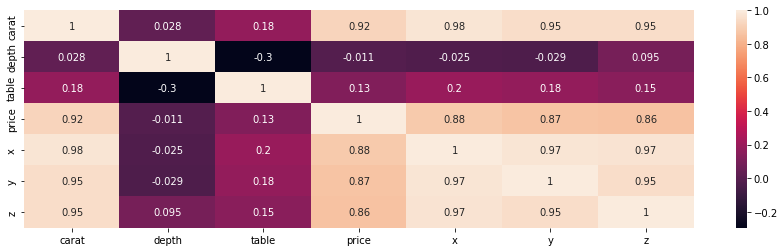

In [ ]:
# Draw a correlation heatmap between the numeric features.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,4))
sns.heatmap(numeric_df.corr(),annot= True)
plt.show()

**Q:** Which features are highly correlated with `price`?

**A:**

**Q:** Is there multicollinearity in the dataset?

**A:**



---

#### Activity 3: Feature Encoding

The dataset contains certain columns that are categorical. However for linear regression, we need all numerical variables. Perform **one-hot encoding** to obtain numeric values from non-numeric categorical values.


In [ ]:
# Create a new dataframe having dummy variables for all the categorical type columns of the dataset using 'get_dummies()' function.
cars_dummies_df = pd.get_dummies(numeric_df, drop_first = True, dtype = int)

In [ ]:
# Print the information of the new dataframe obtained after one-hot encoding
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


----

#### Activity 4: Train-Test Split

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set and keep the `price` as the target variables.

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(numeric_df, test_size = 0.30, random_state = 42)

features = list(numeric_df.columns)
features.remove('price')

X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']

In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.


---

#### Activity 5: Model Training using `statsmodels.api`

Now build a multiple linear regression model using the `statsmodels.api` module.
Also, print the summary of the linear regression model built.

In [ ]:
#  Build a linear regression model using all the features to predict insurance charges.
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()
lin_reg.params


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    20574.645606
carat    10596.703126
depth     -200.181710
table     -103.468625
x        -1244.524463
y           32.344837
z           45.132973
dtype: float64

In [ ]:
# Print the summary of the linear regression report.
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 3.834e+04
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:07:57   Log-Likelihood:            -3.2982e+05
No. Observations:               37758   AIC:                         6.596e+05
Df Residuals:                   37751   BIC:                         6.597e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.057e+04    530.642     38.773      0.0




**Q:** What is the Adjusted $R^2$ value?

**A:**




---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project69**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project69** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---